# 📊 Trabajando con Dataset "Obesity"
El dataset "Estimation of obesity levels based on eating habits and physical condition" proviene del UCI Machine Learning Repository, un reconocido repositorio que contiene conjuntos de datos ampliamente utilizados en la comunidad de machine learning para tareas de clasificación, regresión y clustering.

##🔄 Alternativas de carga de Datasets

#### 1. 🧠 Desde el repositorio Github de AAP
Aprovechando la capacidad del Dataframe de Pandas para cargar archivos tabulares desde una URL y aprovechando la flexibilidad de los repositorios GitHub, se carga el dataset a partir de la URL de un repositorio creado para la cátedra de aprendizaje automático profundo de la UNLP.

**Nota**: El dataset original nombra al atributo tipo de obesidad como "NObe**yes**dad" (error de traducción?). En el repositorio de AAP se renombro a "NObe**si**ty"

También es posible cargar el dataset mediante diferentes métodos:

```python
ds_url = "https://raw.githubusercontent.com/aap-unlp/datasets/main/obesity_uci/obesity_uci.csv"
df = pd.read_csv(ds_url)
```

#### 2. 📁 Desde Google Drive

```python
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/path/to/obesity_dataset.csv')
```

#### 3. 🐍 Usando APIs de Paquetes Python

```python
# Usando el paquete ucimlrepo (recomendado)
from ucimlrepo import fetch_ucirepo
obesity = fetch_ucirepo(id=544)
df = pd.concat([obesity.data.features, obesity.data.targets], axis=1)

# Usando scikit-learn (cuando disponible)
from sklearn.datasets import fetch_ucirepo
obesity = fetch_ucirepo(id=544)
df = pd.concat([obesity.data.features, obesity.data.targets], axis=1)
```

#### 4. 💾 Desde Archivo Local

```python
ds_path = 'ruta/local/obesity_dataset.csv'
df = pd.read_csv(ds_path)
```


### 🧠 Carga desde el repositorio Github de AAP

In [1]:
import pandas as pd
import numpy as np


print("🔄 Cargando dataset desde GitHub...")

ds_url = "https://raw.githubusercontent.com/aap-unlp/datasets/main/obesity_uci/obesity_uci.csv"

try:
    df = pd.read_csv(ds_url)
    print(f"✅ Dataset cargado exitosamente!")
    print(f"📊 Dimensiones: {df.shape}")
    display(f"📋 Columnas: {list(df.columns)}")
    print(f"\n🔍 Primeras 5 filas:")
    display(df.head(5))
    display(df.isnull().sum())
except Exception as e:
    print(f"❌ Error al cargar: {e}")

🔄 Cargando dataset desde GitHub...
✅ Dataset cargado exitosamente!
📊 Dimensiones: (2111, 17)


"📋 Columnas: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObesity']"


🔍 Primeras 5 filas:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


## 🛠️ Ejercicio
Indique qué tipo de información brindan las siguientes representaciones gráficas:
 * Diagrama de Barras
 * Histograma
 * Diagrama de caja
 * Diagrama de dispersión

Luego, genere al menos un ejemplo de cada representación usando el dataset de obesidad y explique cómo interpretar cada uno.


### 📊 Diagrama de Barras - Distribución de Género

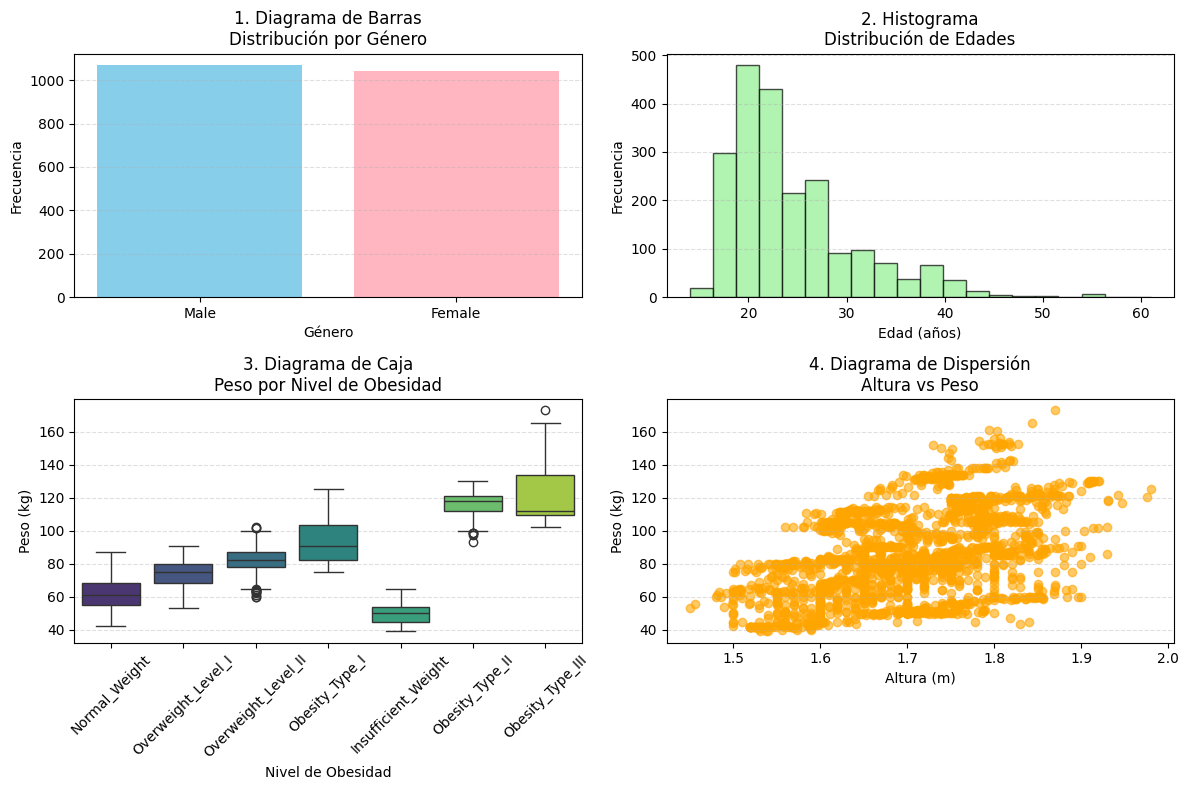

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# 1. Diagrama de Barras - Género
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightpink'])
plt.title('1. Diagrama de Barras\nDistribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.grid(axis='y',alpha=0.4, linestyle='--')

# 2. Histograma - Edad
plt.subplot(2, 2, 2)
plt.hist(df['Age'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('2. Histograma\nDistribución de Edades')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.grid(axis='y',alpha=0.4, linestyle='--')

# 3. Diagrama de Caja - Peso por Obesidad
plt.subplot(2, 2, 3)
sns.boxplot(x='NObesity', y='Weight', data=df, hue='NObesity', palette='viridis', legend=False)
plt.title('3. Diagrama de Caja\nPeso por Nivel de Obesidad')
plt.xlabel('Nivel de Obesidad')
plt.ylabel('Peso (kg)')
plt.xticks(rotation=45)
plt.grid(axis='y',alpha=0.4, linestyle='--')

# 4. Diagrama de Dispersión - Altura vs Peso
plt.subplot(2, 2, 4)
plt.scatter(df['Height'], df['Weight'], alpha=0.6, color='orange')
plt.title('4. Diagrama de Dispersión\nAltura vs Peso')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.grid(axis='y',alpha=0.4, linestyle='--')


plt.tight_layout()
plt.show()

## 🛠️ Ejercicio
Complete el siguiente cuadro y dibuje el diagrama de caja del atributo “weight”:

* Mínimo
* Máximo
* Q1
* Q2 o mediana
* Q3
* RIC
* Bigote superior
* Bigote inferior
* Intervalos de valores atípicos leves
* Valores atípicos leves
* Intervalos de valores atípicos extremos
* Valores atípicos extremos



### 📊 Cálculo de Medidas Estadística

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular medidas estadísticas para Weight
weight_data = df['Weight']
q1 = weight_data.quantile(0.25)
q2 = weight_data.quantile(0.50)  # Mediana
q3 = weight_data.quantile(0.75)
iqr = q3 - q1

# Bigotes (1.5 * IQR)
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

# Identificar valores atípicos
mild_outliers_lower = weight_data[(weight_data < lower_whisker) & (weight_data >= q1 - 3 * iqr)]
mild_outliers_upper = weight_data[(weight_data > upper_whisker) & (weight_data <= q3 + 3 * iqr)]
extreme_outliers_lower = weight_data[weight_data < q1 - 3 * iqr]
extreme_outliers_upper = weight_data[weight_data > q3 + 3 * iqr]

print("Medidas estadísticas del atributo 'Weight':")
print(f"Mínimo.........: {weight_data.min():.2f} kg")
print(f"Máximo.........: {weight_data.max():.2f} kg")
print(f"Q1.............: {q1:.2f} kg")
print(f"Q2 (Mediana)...: {q2:.2f} kg")
print(f"Q3.............: {q3:.2f} kg")
print(f"RIC............: {iqr:.2f} kg")
print(f"Bigote inferior: {lower_whisker:.2f} kg")
print(f"Bigote superior: {upper_whisker:.2f} kg")

Medidas estadísticas del atributo 'Weight':
Mínimo.........: 39.00 kg
Máximo.........: 173.00 kg
Q1.............: 65.47 kg
Q2 (Mediana)...: 83.00 kg
Q3.............: 107.43 kg
RIC............: 41.96 kg
Bigote inferior: 2.54 kg
Bigote superior: 170.37 kg


### 📦 Diagrama de Caja del Atributo "Weight"

173.0


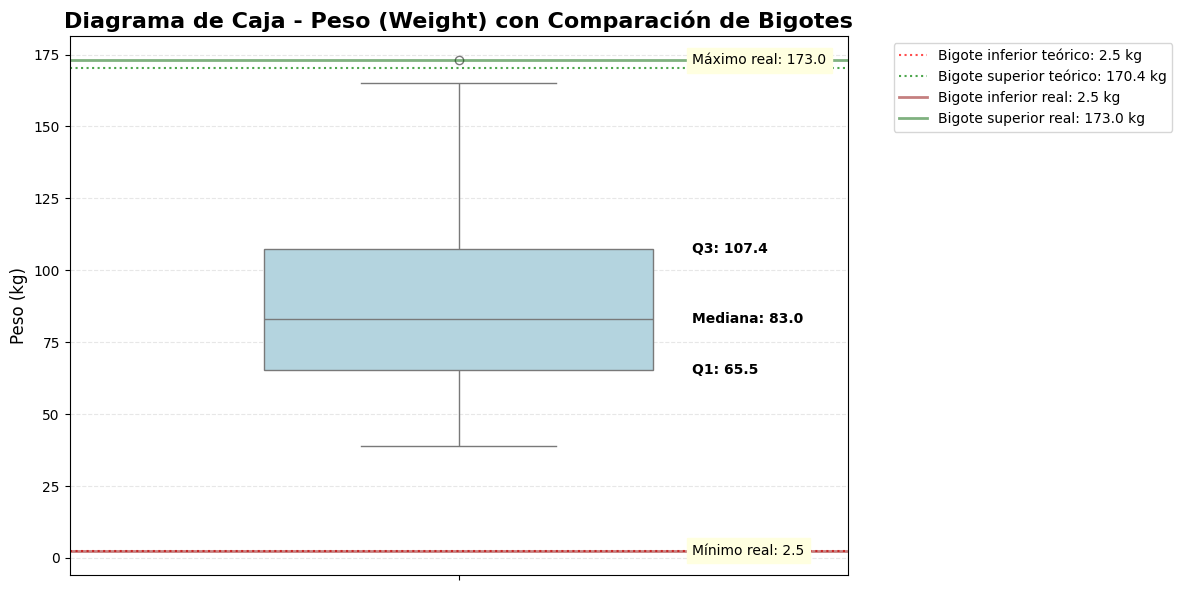

In [4]:
# Calcular medidas
weight_data = df['Weight'].dropna()
q1 = weight_data.quantile(0.25)
q2 = weight_data.quantile(0.50)
q3 = weight_data.quantile(0.75)
iqr = q3 - q1

# Bigotes teóricos
lower_whisker_theoretical = q1 - 1.5 * iqr
upper_whisker_theoretical = q3 + 1.5 * iqr

# Bigotes reales
lower_whisker_real = min(weight_data.min(), lower_whisker_theoretical)
upper_whisker_real = max(weight_data.max(), upper_whisker_theoretical)

print(weight_data.max())
# Configurar el estilo
plt.figure(figsize=(12, 6))
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.3

# Crear diagrama de caja
sns.boxplot(y=weight_data, color='lightblue', width=0.5)
plt.title('Diagrama de Caja - Peso (Weight) con Comparación de Bigotes',
          fontsize=16, fontweight='bold')
plt.ylabel('Peso (kg)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Líneas de referencia para bigotes TEÓRICOS
plt.axhline(y=lower_whisker_theoretical, color='red', linestyle=':', alpha=0.7,
           label=f'Bigote inferior teórico: {lower_whisker_theoretical:.1f} kg')
plt.axhline(y=upper_whisker_theoretical, color='green', linestyle=':', alpha=0.7,
           label=f'Bigote superior teórico: {upper_whisker_theoretical:.1f} kg')

# Líneas para bigotes REALES
plt.axhline(y=lower_whisker_real, color='darkred', linestyle='-', alpha=0.5, linewidth=2,
           label=f'Bigote inferior real: {lower_whisker_real:.1f} kg')
plt.axhline(y=upper_whisker_real, color='darkgreen', linestyle='-', alpha=0.5, linewidth=2,
           label=f'Bigote superior real: {upper_whisker_real:.1f} kg')

# Anotaciones
plt.text(0.3, q1, f'Q1: {q1:.1f}', ha='left', va='center',
         backgroundcolor='white', fontweight='bold')
plt.text(0.3, q2, f'Mediana: {q2:.1f}', ha='left', va='center',
         backgroundcolor='white', fontweight='bold')
plt.text(0.3, q3, f'Q3: {q3:.1f}', ha='left', va='center',
         backgroundcolor='white', fontweight='bold')

plt.text(0.3, lower_whisker_real, f'Mínimo real: {lower_whisker_real:.1f}',
         ha='left', va='center', backgroundcolor='lightyellow')
plt.text(0.3, upper_whisker_real, f'Máximo real: {upper_whisker_real:.1f}',
         ha='left', va='center', backgroundcolor='lightyellow')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Significado e Interpretación del boxplot

📈 Cuartiles - Dividir los datos en 4 partes Iguales
* Q1 (Primer Cuartil):
  
  El valor que separa el 25% inferior de los datos del 75% superior. Es el percentil 25.

  📌 Significado: El 25% de las personas pesa menos de Q1 y el 75% pesa más.

* Q2 o Mediana (Segundo Cuartil):
  El valor que divide los datos en dos mitades iguales. Es el percentil 50.

  📌 Significado: La mitad de las personas pesa menos que la mediana y la mitad pesa más.

* Q3 (Tercer Cuartil):
  El valor que separa el 75% inferior de los datos del 25% superior. Es el percentil 75.

  📌 Significado: El 75% de las personas pesa menos de Q3 y el 25% pesa más.

* RIC (Rango Intercuartílico)
  La diferencia entre Q3 y Q1. Representa el rango donde se encuentra el 50% central de los datos.
  Fórmula: RIC = Q3 - Q1
  📌 Significado: Mide la dispersión de la mitad central de los datos.


📏 Bigotes - Límites de los Datos "Normales"
* Bigote Inferior:
  El límite inferior para datos normales. Se calcula como:
  Bigote Inferior = Q1 - 1.5 × RIC

  📌 Significado: Valores por debajo de este límite se consideran potencialmente atípicos.

* Bigote Superior
  El límite superior para datos normales. Se calcula como:
  Bigote Superior = Q3 + 1.5 × RIC

  📌 Significado: Valores por encima de este límite se consideran potencialmente atípicos.

⚠️ Valores Atípicos (Outliers)

* Valores Atípicos Leves

  Datos que están entre:
    Inferiores: [Q1 - 3 × RIC, Q1 - 1.5 × RIC]
    Superiores: [Q3 + 1.5 × RIC, Q3 + 3 × RIC]

  📌 Significado: Valores inusuales pero no extremadamente raros.
  
* Valores Atípicos Extremos
  Datos que están fuera de:
    Inferiores: (-∞, Q1 - 3 × RIC)
    Superiores: (Q3 + 3 × RIC, +∞)

  📌 Significado: Valores muy raros que podrían ser errores de medición o casos excepcionales.

## 🛠️ Ejercicio
Discretice el atributo del consumo de agua diario en litros (“CH2O”) en tres intervalos: Bajo, Medio y Alto. Indique en la tabla los intervalos utilizados y la cantidad respectivas de ejemplos de cada uno al discretizar por rango y por intervalo. Luego, explique porque los ejemplos no quedaron divididos en intervalos con la misma cantidad de valores.

```text
* Discretización por Rango     ==> Bajo, Medio, Alto (intervalo y valores para c/u)
* Discretización por Intervalo ==> Bajo, Medio, Alto (intervalo y valores para c/u)
```

🔢 Discretización por Rango
  
  Divide los datos en intervalos que contienen aproximadamente la misma cantidad de observaciones (basado en cuantiles). Ideal cuando los datos no están distribuidos uniformemente.

In [5]:
CH2O_range = pd.qcut(df['CH2O'], q=3)  # 3 grupos con similar cantidad de datos
range_counts = CH2O_range.value_counts().sort_index()

# Convertimos a DataFrame y agregamos columna con etiquetas (SOLO PARA VISUALIZACION)
range_counts = range_counts.to_frame(name='frecuencia')
range_counts['valor'] = ['Bajo', 'Medio', 'Alto']

display(range_counts)

,frecuencia,valor
CH2O,,
"(0.999, 1.92]",704,Bajo
"(1.92, 2.185]",703,Medio
"(2.185, 3.0]",704,Alto


📏 Discretización por Intervalo
Divide los datos en intervalos de igual tamaño (ancho constante), basándose en el valor mínimo y máximo de la variable. Se puede especificar el número de intervalos con `bins=n`.


In [6]:
CH2O_interval = pd.cut(df['CH2O'], bins=3)  # 3 intervalos de igual ancho
interval_counts = CH2O_interval.value_counts().sort_index()

# Convertimos a DataFrame y agregamos columna con etiquetas (SOLO PARA VISUALIZACION)
interval_counts = interval_counts.to_frame(name='frecuencia')
interval_counts['valor'] = ['Bajo', 'Medio', 'Alto']

display(interval_counts)

,frecuencia,valor
CH2O,,
"(0.998, 1.667]",576,Bajo
"(1.667, 2.333]",910,Medio
"(2.333, 3.0]",625,Alto
